In [6]:
pkg load linear-algebra
pkg load statistics

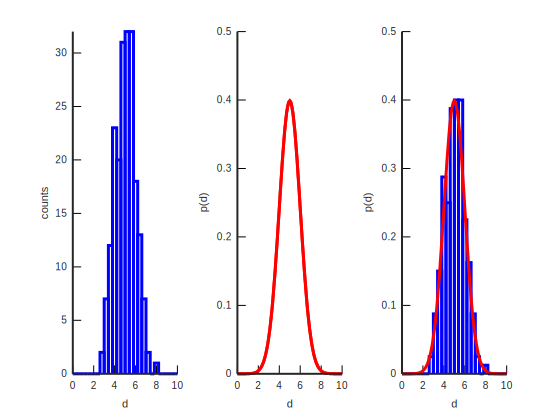

In [10]:
## gda02_01
## Distribution and histogram

Dd = 0.1;
N = 101;
d = Dd*[0:N-1]';
dmin=0;
dmax=10;

sd = 1.0;
dbar = 5.0;
p = exp(-0.5*(d-dbar).^2/(sd^2))/(sqrt(2*pi)*sd);
norm = Dd*sum(p);
p = p/norm;

M=200;
%r=random('Normal',dbar,sd,M,1);
r=random('Normal',dbar,sd,M,1);
Nb=26;
Db=(dmax-dmin)/(Nb-1);
bins=dmin+Db*[0:Nb-1]';
h = hist(r,bins)';
hmax=max(h);

figure(1);
clf;

% plot pdf
subplot(1,3,2);
set(gca,'LineWidth',2);
hold on;
axis( [dmin, dmax, 0, 0.5 ] );
plot(d,p,'r-','LineWidth',3);
xlabel('d');
ylabel('p(d)');

% plot pdf
subplot(1,3,2);
set(gca,'LineWidth',2);
hold on;
axis( [dmin, dmax, 0, 0.5 ] );
plot(d,p,'r-','LineWidth',3);
xlabel('d');
ylabel('p(d)');

%plot histogram
subplot(1,3,1);
set(gca,'LineWidth',2);
hold on;
axis( [dmin, dmax, 0, hmax ] );
% improvise bar chart
for i = [1:Nb]
    tb = [bins(i)-Db/2, bins(i)-Db/2, bins(i)+Db/2, bins(i)+Db/2]';
    th = [0, h(i), h(i), 0]';
    plot(tb,th,'b-','LineWidth',3);
end
xlabel('d');
ylabel('counts');

% convert histogram to an approximate pdf
norm = Db*sum(h);
h=h/norm;

% plot dpf and histogram superimposed
subplot(1,3,3);
set(gca,'LineWidth',2);
hold on;
axis( [dmin, dmax, 0, 0.5 ] );
% improvise bar chart
for i = [1:Nb]
    tb = [bins(i)-Db/2, bins(i)-Db/2, bins(i)+Db/2, bins(i)+Db/2]';
    th = [0, h(i), h(i), 0]';
    plot(tb,th,'b-','LineWidth',3);
end
plot(d,p,'r-','LineWidth',3);
xlabel('d');
ylabel('p(d)');

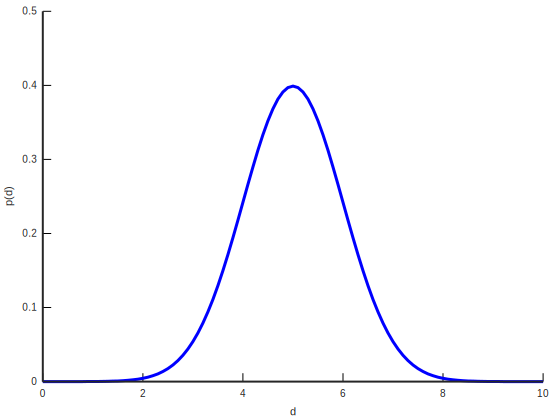

In [12]:
## gda02_02
## A normal PDF

% d-axis
Dd = 0.1;
N = 101;
d = Dd*[0:N-1]';
dmin=0;
dmax=10;

% Normal pdf
dbar = 5;
sd = 1;
p = exp(-0.5*((d-dbar).^2)/sd^2)/(sqrt(2*pi)*sd);

% plot
figure(1);
clf;
set(gca,'LineWidth',2);
hold on;
axis( [dmin, dmax, 0, 0.5 ] );
plot(d,p,'b-','LineWidth',3);
xlabel('d');
ylabel('p(d)');

total probabilty 1.000000
mean 4.999998 and variance 0.999988


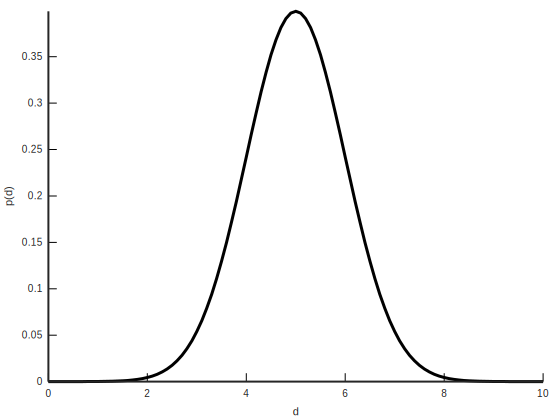

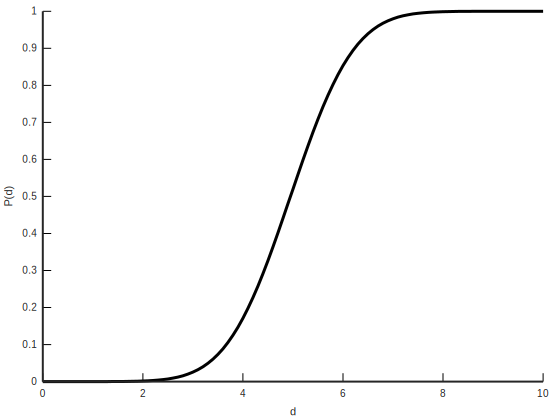

In [13]:
## gda02_03
## Operations on a probability distribution

% axes
Dd = 0.1;
N = 101;
d = Dd*[0:N-1]';
dmin=0;
dmax=10;

% Normal distribution
dbar = 5;
sigma = 1;
sigma2=sigma^2;
p = exp(-0.5*(d-dbar).^2/sigma2) / (sqrt(2*pi)*sigma);

% plot p
figure(1);
clf;
set(gca,'LineWidth',2);
hold on;
axis([0,10,0,max(p)]);
plot(d,p,'k-','LineWidth',3);
xlabel('d');
ylabel('p(d)');

% total probability
Ptotal = Dd * sum(p);
fprintf('total probabilty %f\n', Ptotal );

% cumulative probability
P = Dd * cumsum(p);
figure(2);
clf;
set(gca,'LineWidth',2);
hold on;
axis([0,10,0,max(P)]);
plot(d,P,'k-','LineWidth',3);
xlabel('d');
ylabel('P(d)');

% mean and variance
Ed = Dd * sum(d.*p);
sigma2 = Dd * sum(((d-Ed).^2).*p);
fprintf('mean %f and variance %f\n', Ed, sigma2 );

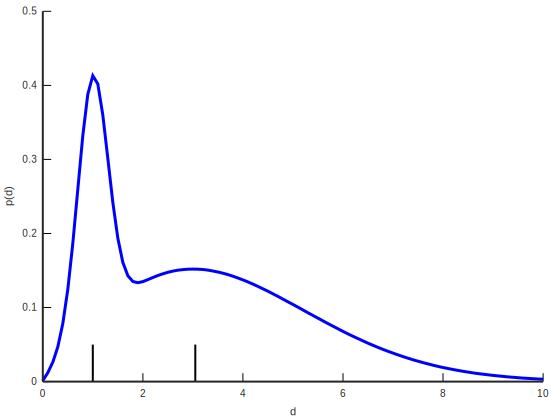

In [14]:
## gda02_04
## Calculaion of mode and mean for a skewed pdf

% d-axis
Dd = 0.1;
N = 101;
d = Dd*[0:N-1]';
dmin=0;
dmax=10;

% Normal pdf
dbar = 0;
sd = 3;
p = d .* exp(-0.5*((d-dbar).^2)/sd^2);
dbar = 1;
sd = 0.3;
p = p + 4*exp(-0.5*((d-dbar).^2)/sd^2);
norm = Dd*sum(p);
p = p/norm;

% maximum liklihood point
[pmax, imax] = max(p);
dml = d(imax);

% maximum liklihood point
[pmax, imax] = max(p);
dml = d(imax);

% mean
dbar = Dd*sum(d.*p);

% plot
figure(1);
clf;
set(gca,'LineWidth',2);
hold on;
axis( [dmin, dmax, 0, 0.5 ] );
plot(d,p,'b-','LineWidth',3);
xlabel('d');
ylabel('p(d)');
plot( [dml, dml]', [0, 0.05]', 'k-', 'LineWidth', 2 );
plot( [dbar, dbar]', [0, 0.05]', 'k-', 'LineWidth', 2 );

std dev 1:  true: 0.500000 estimated: 0.500000
std dev 2:  true: 1.500000 estimated: 1.492457


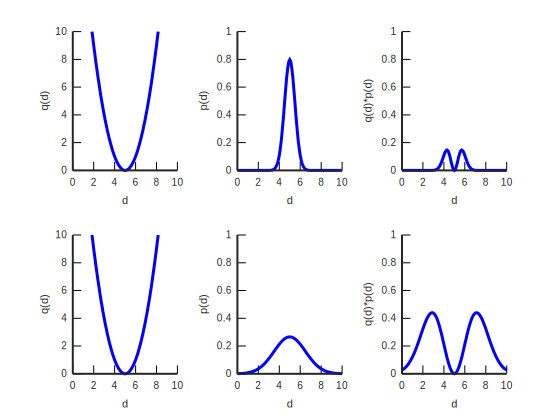

In [16]:
## gda02_05
## Calculaion of variance

% d-axis
Dd = 0.1;
N = 101;
d = Dd*[0:N-1]';
dmin=0;
dmax=10;

% two Normal pdfs with different variances
dbar = 5;
sd1 = 0.5;
p1 = exp(-0.5*((d-dbar).^2)/sd1^2)/(sqrt(2*pi)*sd1);
norm1 = Dd*sum(p1);

dbar = 5;
sd2 = 1.5;
p2 = exp(-0.5*((d-dbar).^2)/sd2^2)/(sqrt(2*pi)*sd2);
norm2 = Dd*sum(p);

% qudratic
q = (d-dbar).^2;

% products
qp1 = q.*p1;
qp2 = q.*p2;

% estimated variances
sd21 = Dd * sum(qp1);
sd1est = sqrt(sd21);
sd22 = Dd * sum(qp2);
sd2est = sqrt(sd22);
disp(sprintf('std dev 1:  true: %f estimated: %f', sd1, sd1est));
disp(sprintf('std dev 2:  true: %f estimated: %f', sd2, sd2est));

% plot
figure(1);
clf;

top=1;

subplot(2, 3, 1 );
set(gca,'LineWidth',2);
hold on;
axis( [dmin, dmax, 0, 10*top ] );
plot(d,q,'b-','LineWidth',3);
xlabel('d');
ylabel('q(d)');

subplot(2, 3, 2 );
set(gca,'LineWidth',2);
hold on;
axis( [dmin, dmax, 0, top ] );
plot(d,p1,'b-','LineWidth',3);
xlabel('d');
ylabel('p(d)');

subplot(2, 3, 3 );
set(gca,'LineWidth',2);
hold on;
axis( [dmin, dmax, 0, top ] );
plot(d,qp1,'b-','LineWidth',3);
xlabel('d');
ylabel('q(d)*p(d)');

subplot(2, 3, 4 );
set(gca,'LineWidth',2);
hold on;
axis( [dmin, dmax, 0, 10*top ] );
plot(d,q,'b-','LineWidth',3);
xlabel('d');
ylabel('q(d)');

subplot(2, 3, 5 );
set(gca,'LineWidth',2);
hold on;
axis( [dmin, dmax, 0, top ] );
plot(d,p2,'b-','LineWidth',3);
xlabel('d');
ylabel('p(d)');

subplot(2, 3, 6 );
set(gca,'LineWidth',2);
hold on;
axis( [dmin, dmax, 0, top ] );
plot(d,qp2,'b-','LineWidth',3);
xlabel('d');
ylabel('q(d)*p(d)');

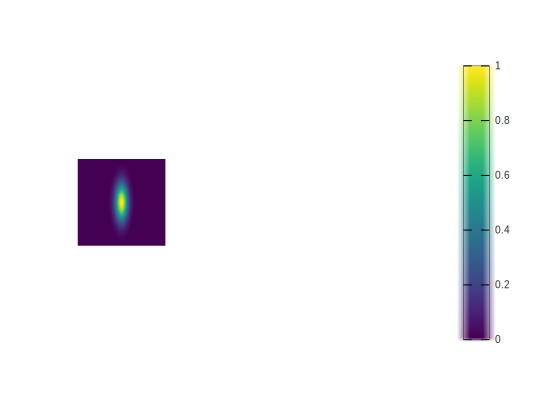

In [30]:
## gda02_06
## 2D Normal distribution, uncorrelated

% d-axis
Dd = 0.1;
N = 101;
d1 = Dd*[0:N-1]';
d2 = Dd*[0:N-1]';
dmin=0;
dmax=10;

d1bar = 5;
d2bar = 5;
sd1 = 1.5;
sd2 = 0.5;
C=zeros(2,2);
C(1,1)=sd1^2;
C(2,2)=sd2^2;
norm = 2*pi*sqrt(det(C));
CI=inv(C);

P=zeros(N,N);
for i = [1:N]
for j = [1:N]
    dd = [ dmin+Dd*(i-1)-d1bar, dmin+Dd*(j-1)-d2bar ]';
    P(i,j) = exp(-0.5*dd'*CI*dd)/norm;
end
end

A = sum(sum(P))*(Dd^2);

gda_draw(' ',P);
colorbar;

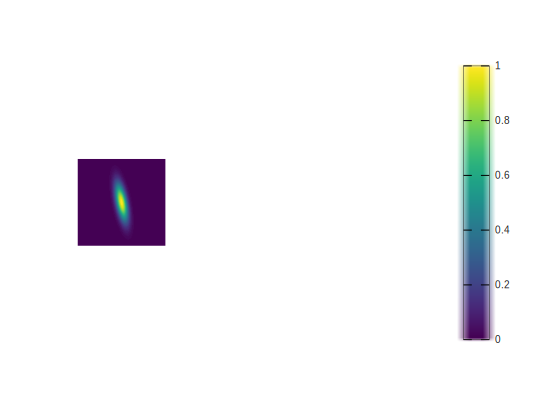

In [31]:
## gda02_07
## 2D Normal distribution, uncorrelated

% d-axis
Dd = 0.1;
N = 101;
d1 = Dd*[0:N-1]';
d2 = Dd*[0:N-1]';
dmin=0;
dmax=10;

d1bar = 5;
d2bar = 5;
sd1 = 1.5;
sd2 = 0.5;
cov = 0.4;
C=zeros(2,2);
C(1,1)=sd1^2;
C(2,2)=sd2^2;
C(1,2)=cov;
C(2,1)=cov;
norm = 2*pi*sqrt(det(C));
CI=inv(C);

P=zeros(N,N);
for i = [1:N]
for j = [1:N]
    dd = [ dmin+Dd*(i-1)-d1bar, dmin+Dd*(j-1)-d2bar ]';
    P(i,j) = exp(-0.5*dd'*CI*dd)/norm;
end
end

A = sum(sum(P))*(Dd^2);

gda_draw(' ',P);
colorbar

In [ ]:
## gda02_08
## 2D Normal distribution, uncorrelated, + correlation, - correlation

% d-axis
Dd = 0.1;
N = 101;
d1 = Dd*[0:N-1]';
d2 = Dd*[0:N-1]';
dmin=0;
dmax=10;

% uncorrelated
d1bar = 5;
d2bar = 5;
sd1 = 1.25;
sd2 = 0.75;
cov = 0.0;
C=zeros(2,2);
C(1,1)=sd1^2;
C(2,2)=sd2^2;
C(1,2)=cov;
C(2,1)=cov;
norm = 2*pi*sqrt(det(C));
CI=inv(C);
P1=zeros(N,N);
for i = [1:N]
for j = [1:N]
    dd = [ dmin+Dd*(i-1)-d1bar, dmin+Dd*(j-1)-d2bar ]';
    P1(i,j) = exp(-0.5*dd'*CI*dd)/norm;
end
end

mycov=0.5;

% positively correlated
d1bar = 5;
d2bar = 5;
sd1 = 1.25;
sd2 = 0.75;
C=zeros(2,2);
C(1,1)=sd1^2;
C(2,2)=sd2^2;
C(1,2)=mycov;
C(2,1)=mycov;
norm = 2*pi*sqrt(det(C));
CI=inv(C);
P2=zeros(N,N);
for i = [1:N]
for j = [1:N]
    dd = [ dmin+Dd*(i-1)-d1bar, dmin+Dd*(j-1)-d2bar ]';
    P2(i,j) = exp(-0.5*dd'*CI*dd)/norm;
end
end

% negatively
d1bar = 5;
d2bar = 5;
sd1 = 1.25;
sd2 = 0.75;
C=zeros(2,2);
C(1,1)=sd1^2;
C(2,2)=sd2^2;
C(1,2)=-mycov;
C(2,1)=-mycov;
norm = 2*pi*sqrt(det(C));
CI=inv(C);
P3=zeros(N,N);
for i = [1:N]
for j = [1:N]
    dd = [ dmin+Dd*(i-1)-d1bar, dmin+Dd*(j-1)-d2bar ]';
    P3(i,j) = exp(-0.5*dd'*CI*dd)/norm;
end
end

gda_draw(' ',P1,' ',P2,' ',P3);
colorbar;

Fontconfig warning: line 146: blank doesn't take any effect anymore. please remove it from your fonts.conf


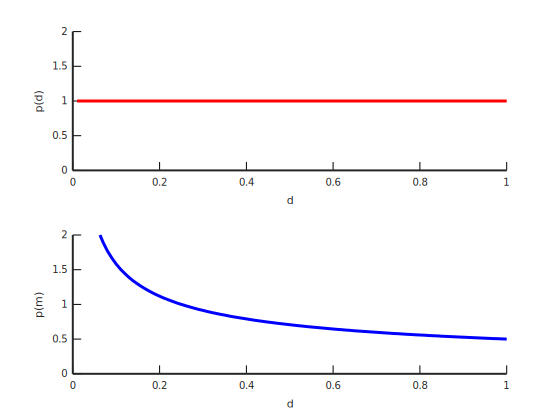

In [2]:
## gda02_09
## 1D uniform p.d.f., p(d)=constant, traansformed to p(m) with m(d)=d^2
## note that m=sqrt(d) and that dm/dd=0.5/sqrt(d)

% d-axis
Dd = 0.01;
N = 100;
d = Dd*[1:N]';
dmin=0;
dmax=1;

% m-axis
Dm = 0.01;
M = 100;
m = Dm*[1:M]';
mmin=0;
mmax=1;

% uniform, p(d)
d1bar = 5;
pd = ones(N,1);

% transform to p(m)
J = abs(0.5 ./sqrt(d));
pm = pd.*J;

figure(1);
clf;

subplot(2,1,1);
set(gca,'LineWidth',2,'FontName','Cambria Math','FontAngle','italic');
hold on;
axis( [0, 1, 0, 2]' );
plot(d,pd,'r-','LineWidth',3);
xlabel('d','FontName','Cambria Math','FontAngle','italic');
ylabel('p(d)','FontName','Cambria Math','FontAngle','italic');

subplot(2,1,2);
set(gca,'LineWidth',2,'FontName','Cambria Math','FontAngle','italic');
hold on;
axis( [0, 1, 0, 2]' );
plot(m,pm,'b-','LineWidth',3);
xlabel('d','FontName','Cambria Math','FontAngle','italic');
ylabel('p(m)','FontName','Cambria Math','FontAngle','italic');

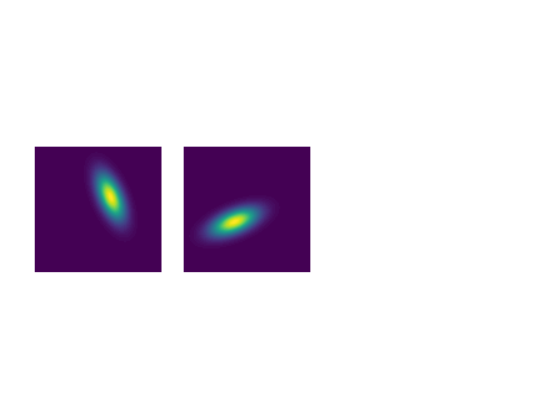

In [7]:
## gda02_11
## Product of two 2D Normal distributions

% d-axis
Dd = 0.1;
N = 101;
d1 = Dd*[0:N-1]';
d2 = Dd*[0:N-1]';
dmin=0;
dmax=10;

% P1
d1bar = 4;
d2bar = 6;
sd1 = 1.25;
sd2 = 0.75;
cov = 0.5;
C=zeros(2,2);
C(1,1)=sd1^2;
C(2,2)=sd2^2;
C(1,2)=cov;
C(2,1)=cov;
norm = 2*pi*sqrt(det(C));
CI=inv(C);
P1=zeros(N,N);
for i = [1:N]
for j = [1:N]
    dd = [ dmin+Dd*(i-1)-d1bar, dmin+Dd*(j-1)-d2bar ]';
    P1(i,j) = exp(-0.5*dd'*CI*dd)/norm;
end
end
% save these parameters
C1=C;
C1I=CI;
DBAR1=[d1bar, d2bar]';

% P2
d1bar = 6;
d2bar = 4;
sd1 = 0.75;
sd2 = 1.25;
cov = -0.5;
C=zeros(2,2);
C(1,1)=sd1^2;
C(2,2)=sd2^2;
C(1,2)=cov;
C(2,1)=cov;
norm = 2*pi*sqrt(det(C));
CI=inv(C);
P2=zeros(N,N);
for i = [1:N]
for j = [1:N]
    dd = [ dmin+Dd*(i-1)-d1bar, dmin+Dd*(j-1)-d2bar ]';
    P2(i,j) = exp(-0.5*dd'*CI*dd)/norm;
end
end

% save these parameters
C2=C;
C2I=CI;
DBAR2=[d1bar, d2bar]';

P1P2 = P1.*P2;
norm = (Dd^2)*sum(sum(P1P2));

% from analytic formula
C3 = inv( C1I + C2I );
DBAR3 = C3 * (C1I*DBAR1 + C2I*DBAR2);
d1bar = DBAR3(1);
d2bar = DBAR3(2);
C=C3;
norm = 2*pi*sqrt(det(C));
CI=inv(C);
P3=zeros(N,N);
for i = [1:N]
for j = [1:N]
    dd = [ dmin+Dd*(i-1)-d1bar, dmin+Dd*(j-1)-d2bar ]';
    P3(i,j) = exp(-0.5*dd'*CI*dd)/norm;
end
end

% plot the analytic one, too, to check results
% gda_draw(' ',P1,' ',P2,' ',P1P2,' ',P3);

gda_draw(' ',P1,' ',P2,' ',P1P2);

Part 1: Correct Distribution
mean: true 5.000000 estimated 4.923520
sigma: true 1.000000 estimated 0.975758
K 37   chi-squared-est   19.668852   P(x2>=x2est)   0.991301

Part 2: Incorrect Distribution
mean: true 5.000000 estimated 4.423520
sigma: true 1.000000 estimated 1.463636
K 37   chi-squared-est   79.898619   P(x2>=x2est)   0.000055


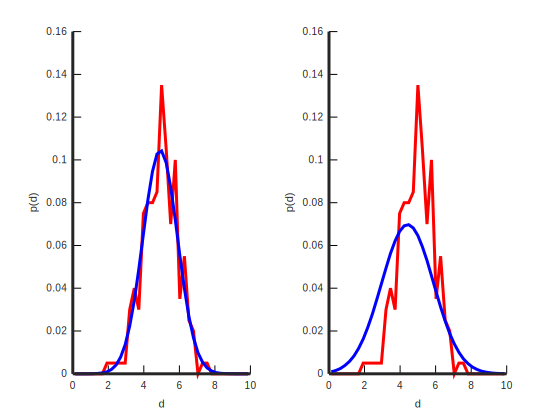

In [8]:
## gda02_12
## Example of a Pierson's chi-squared test

figure(1);
clf;

% Part 1: Correct Distribution
fprintf('Part 1: Correct Distribution\n');

% make some Gaussian random daya
Ndata = 200;
dbar = 5;
sigmad = 1;
drandom = random('Normal',dbar,sigmad,Ndata,1);

% estimate mean and standard deviation of d's
dbarest = mean(drandom);
sigmadest = std(drandom);
fprintf('mean: true %f estimated %f\n', dbar, dbarest);
fprintf('sigma: true %f estimated %f\n', sigmad, sigmadest);

% make histogram.  The bins are from d +/- Dd/2.
dmin = 0;
dmax = 10;
Nbin=40;
Dd = (dmax-dmin)/(Nbin-1);
d = Dd*[0:Nbin-2]+Dd/2;
dhist = hist( drandom, d);

% normalize to unit area
norm = sum(dhist);
pdest = dhist / norm;

% theoretical distribution
pdtrue = normcdf(d+Dd/2,dbarest,sigmadest)-normcdf(d-Dd/2,dbarest,sigmadest);

% plot
subplot(1,2,1);
hold on;
set(gca,'LineWidth',3);
plot(d,pdest,'r-','LineWidth',3);
plot(d,pdtrue,'b-','LineWidth',3);
xlabel('d');
ylabel('p(d)');

% compute chi squared statistic
x2est = Ndata*sum( ((pdest-pdtrue).^2) ./ pdtrue );
K = Nbin-3;

% compute P( x2 >= x2est ) = 1 - P(x2<x2est);
P = 1-chi2cdf( x2est, K );
fprintf('K %d   chi-squared-est   %f   P(x2>=x2est)   %f\n', K, x2est, P );

fprintf('\n');

% Part 2: Incorrect Distribution
fprintf('Part 2: Incorrect Distribution\n');

% estimate mean and standard deviation of d's
% then make them incorrect
dbarest = mean(drandom)-0.5;
sigmadest = std(drandom)*1.5;
fprintf('mean: true %f estimated %f\n', dbar, dbarest);
fprintf('sigma: true %f estimated %f\n', sigmad, sigmadest);

% incorrecr theoretical distribution
pdtrue = normcdf(d+Dd/2,dbarest,sigmadest)-normcdf(d-Dd/2,dbarest,sigmadest);

% plot
subplot(1,2,2);
hold on;
set(gca,'LineWidth',3);
plot(d,pdest,'r-','LineWidth',3);
plot(d,pdtrue,'b-','LineWidth',3);
xlabel('d');
ylabel('p(d)');

% compute chi squared statistic
x2est = Ndata*sum( ((pdest-pdtrue).^2) ./ pdtrue );
K = Nbin-3;

% compute P( x2 >= x2est ) = 1 - P(x2<x2est);
P = 1-chi2cdf( x2est, K );
fprintf('K %d   chi-squared-est   %f   P(x2>=x2est)   %f\n', K, x2est, P );

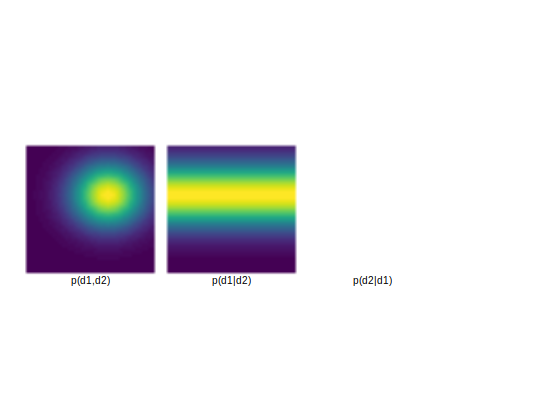

In [9]:
## gda02_13
## Illustrate a computing conditional distributions from a joint distribution 

% set up vectors da and d2
L=40;
Dd = 1.0;
d1 = Dd*[0:L-1]';
d2 = Dd*[0:L-1]';

% make a normal distribution
d1bar=15;
d2bar=25;
s1=7;
s2=8;
norm=1/(2*pi*s1*s2);
p1=exp(-((d1-d1bar).^2)/(2*s1*s1));
p2=exp(-((d2-d2bar).^2)/(2*s2*s2));
P=norm*p1*p2';

% sum along columns, which integrates P along d2 to get p1=p(d1)
p1 = Dd*sum(P,2);
% sum along rows, which integrates P along d1 to get p2=p(d2)
p2 = Dd*sum(P,1)';

% conditional distribution P1g2 = P(d1|d2) = P(d1,d2)/p2
P1g2 = P ./ (ones(L,1)*p2');

% conditional distribution P2g1 = P(d2|d1) = P(d1,d2)/p1
P2g1 = P ./ (p1*ones(L,1)');

% use simple drawing function that encapsulates all the graphics
gda_draw(P,'caption p(d1,d2)',P1g2,'caption p(d1|d2)',P2g1,'caption p(d2|d1)');

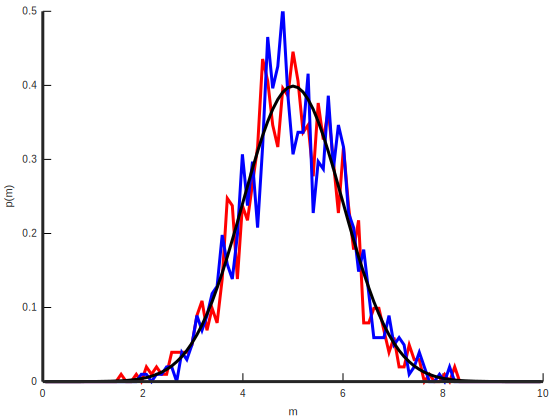

In [10]:
## gda02_14
## 

% generate Normal random numbers with these mean and variance
N=1000;
mbar = 5.0;
sigma = 1.0;

% by transformation of a uniform distribution
mnormal1 = random('Normal',mbar,sigma,N,1);

% by transformation of a uniform distribution
muniform = random('unif',0,1,N,1);
mnormal2 = norminv(muniform,mbar,sigma);

% histogram
Nbins=100;
mmin=0;
mmax=10;
Dm = (mmax-mmin)/(Nbins-1);
m = mmin+Dm*[0:Nbins-2]'+Dm/2;
h1 = hist(mnormal1,m);
norm = Dm*sum(h1);
h1 = h1/norm;
h2 = hist(mnormal2,m);
norm = Dm*sum(h2);
h2 = h2/norm;
p = normpdf(m,mbar,sigma);

% plot
figure(1)
clf;
set(gca,'LineWidth',3);
hold on;
axis( [mmin, mmax, 0, 0.5] );
plot( m, h1, 'r-', 'LineWidth', 3 );
plot( m, h2, 'b-', 'LineWidth', 3 );
plot( m, p, 'k-', 'LineWidth', 3 );
xlabel('m');
ylabel('p(m)');

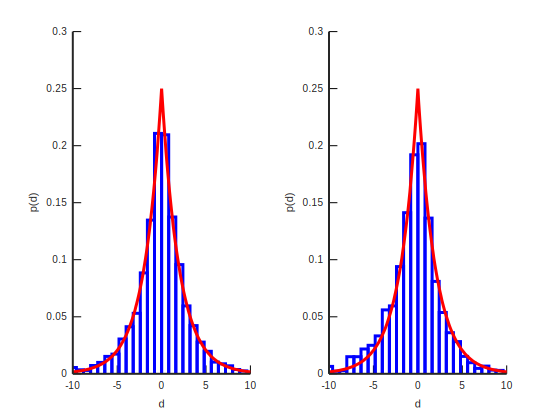

In [11]:
## gda02_15
## create realizations of an exponential p.d.f. in two ways, transformation of a uniform distribution,
## and the Metropolis algoritm.  In this example, the p.d.f. is p(d) = c*exp(-d)/c); for d>0

dmin = -10;
dmax = 10;
N = 201;
Dd = (dmax-dmin)/(N-1);
d = dmin + Dd*[0:N-1]';

% evaluate exponential distribution
c = 2.0;
pexp = (0.5/c)*exp(-abs(d)/c);

% the usual transformation rule is p(d) = p(m(d)) |dm/dd|
% suppose that p(m) is uniform over m=(-1,1) with amplitude 0.5
% handle the absolute value sign by breaking into two parts,
% Part 1: m>0, 
%     (1/c)*exp(-d/c)=(+/-)dm/dd.  Choose the + sign, in order
%     to map m=0 with d=0 and m=1 to d=infinity.  Then 
%     m =(integral)(1/c)*exp(-d/c)dd+constant.  Choose constant=1
%     so m=1-exp(-d/c). Inverting gives d=-c*ln((1-m))
% Part 2: m<0
%     similar calculation gives d=-c*ln((1+m))
%     so overall d=-sgn(m)*c*ln((1-abs(m)))

% transform realizations of a uniform distribution to p(d)
M=5000;
rm=random('Uniform',-1,1,M,1);
rd=-sign(rm).*c.*log((1-abs(rm)));

% histogram
Nb=26;
Db=(dmax-dmin)/(Nb-1);
bins=dmin+Db*[0:Nb-1]';
h = hist(rd,bins)';

% convert histogram to a p.d.f.
norm=Db*sum(h);
h=h/norm;

figure(1);
clf;

% plot histogram of transformed realizations and true pdf
subplot(1,2,1);
set(gca,'LineWidth',2);
hold on;
axis( [dmin, dmax, 0, 0.3 ] );
% improvise bar chart
for i = [1:Nb-1]
    tb = [bins(i)-Db/2, bins(i)-Db/2, bins(i)+Db/2, bins(i)+Db/2]';
    th = [0, h(i), h(i), 0]';
    plot(tb,th,'b-','LineWidth',3);
end
plot(d,pexp,'r-','LineWidth',3);
xlabel('d');
ylabel('p(d)');

% Metropolis
Niter=5000;
rd  = zeros(Niter,1);
prd = zeros(Niter,1);
rd(1)  = 0.0;
prd(1) = (1/c)*exp(-abs(rd(1))/c);
s = 1;

for k = [2:Niter]
    % old realization
    rdo = rd(k-1);
    prdo = prd(k-1);
    rdn = random('Normal',rdo,s);
    prdn = (0.5/c)*exp(-abs(rdn)/c);
    % test parameter, ratio of probabilities
    a = prdn/prdo;
    % acceptance test
    if( a>1 )
        rd(k) = rdn;
        prd(k) = prdn;
    else
        r = random('Uniform',0,1);
        if( a>r )
            rd(k) = rdn;
            prd(k) = prdn;
        else
            rd(k) = rdo;
            prd(k) = prdo;
        end
    end
end

% histogram, converted to a p.d.f.
h = hist(rd,bins)';
norm=Db*sum(h);
h=h/norm;

% plot histogram of transformed realizations and true pdf
subplot(1,2,2);
set(gca,'LineWidth',2);
hold on;
axis( [dmin, dmax, 0, 0.3 ] );
% improvise bar chart
for i = [1:Nb-1]
    tb = [bins(i)-Db/2, bins(i)-Db/2, bins(i)+Db/2, bins(i)+Db/2]';
    th = [0, h(i), h(i), 0]';
    plot(tb,th,'b-','LineWidth',3);
end
plot(d,pexp,'r-','LineWidth',3);
xlabel('d');
ylabel('p(d)');